In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import pylab
import scipy.stats as stats
sns.set()

In [50]:
df = pd.read_csv('Ecommerce Customers.csv')

In [51]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [53]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [54]:
df.shape

(500, 8)

In [55]:
df.apply(pd.isnull).sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [56]:
df.duplicated().sum()

np.int64(0)

In [57]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

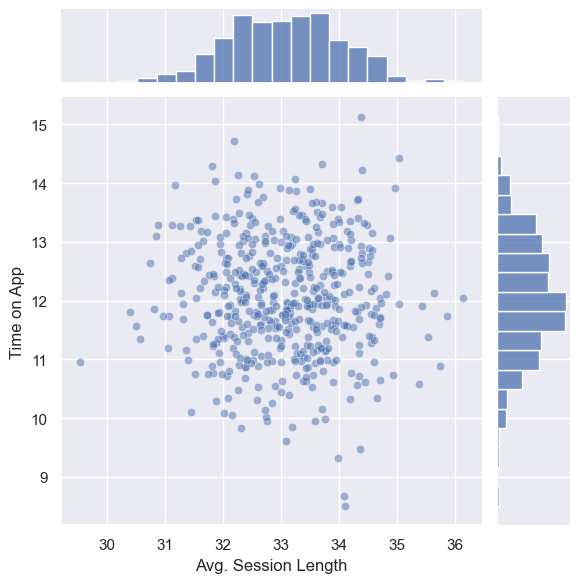

In [58]:
sns.jointplot(data = df, x = 'Avg. Session Length', y = 'Time on App', alpha = 0.5)

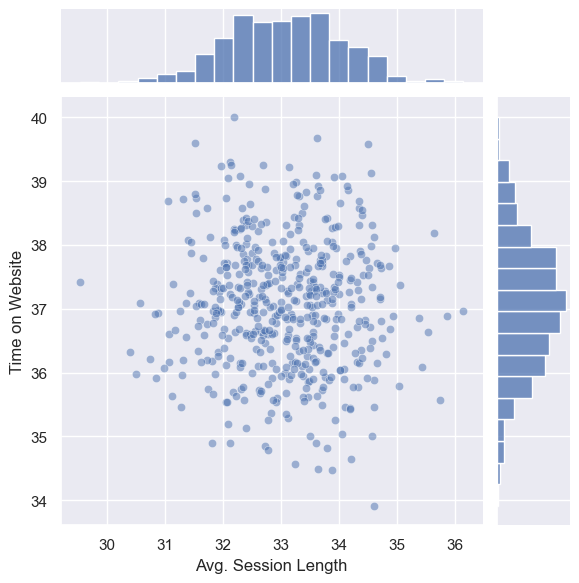

In [59]:
sns.jointplot(data = df, x = 'Avg. Session Length', y = 'Time on Website', alpha = 0.5)

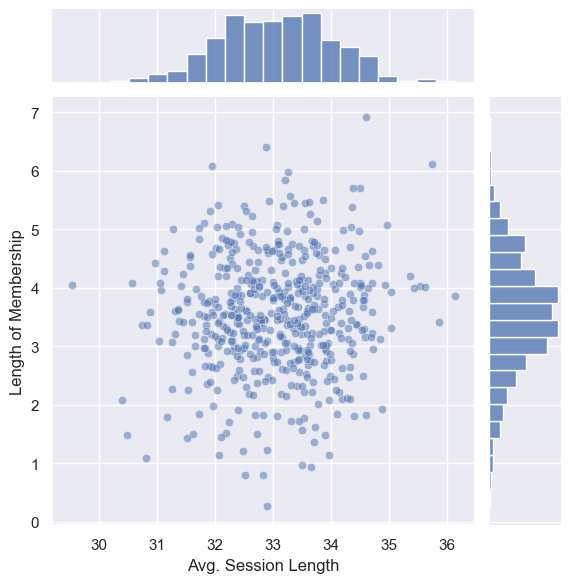

In [60]:
sns.jointplot(data = df, x = 'Avg. Session Length', y = 'Length of Membership', alpha = 0.5)

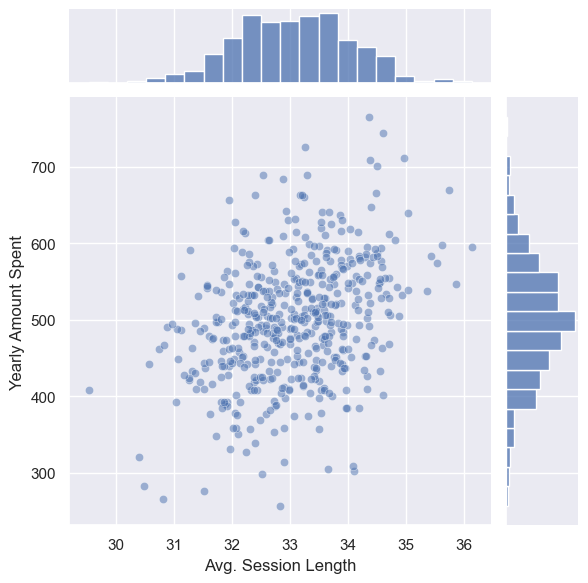

In [61]:
sns.jointplot(data = df, x = 'Avg. Session Length', y = 'Yearly Amount Spent', alpha = 0.5)

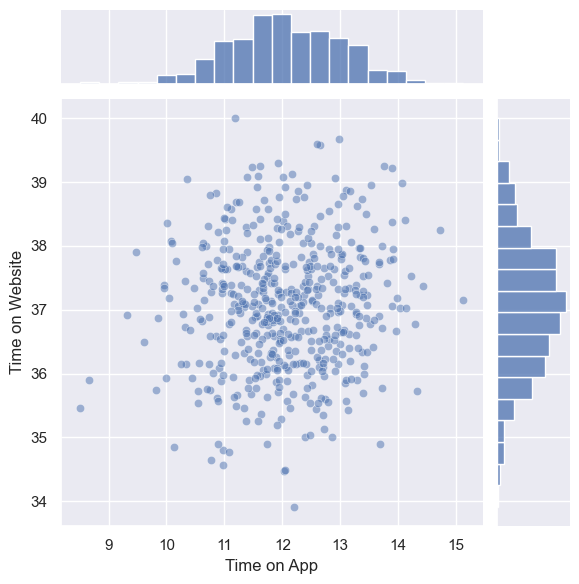

In [62]:
sns.jointplot(data = df, x = 'Time on App', y = 'Time on Website', alpha = 0.5)

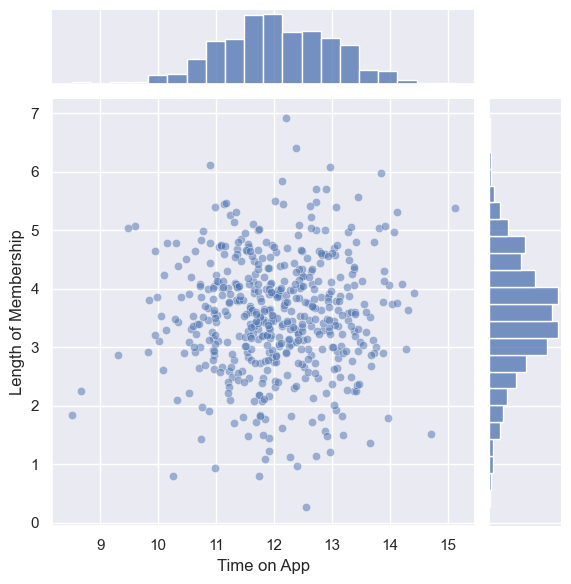

In [63]:
sns.jointplot(data = df, x = 'Time on App', y = 'Length of Membership', alpha = 0.5)

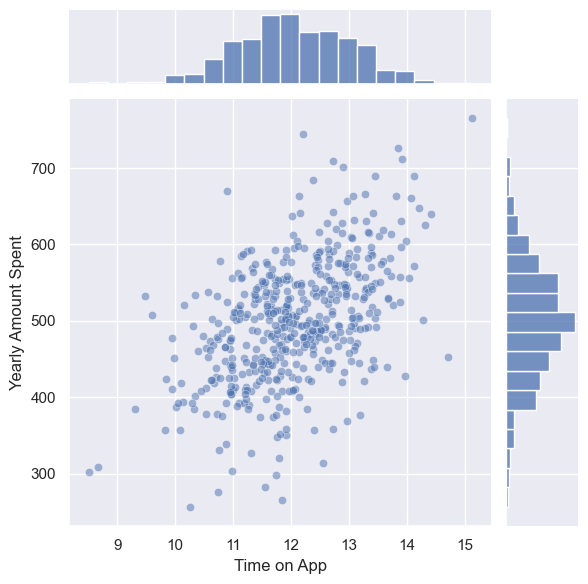

In [64]:
sns.jointplot(data = df, x = 'Time on App', y = 'Yearly Amount Spent', alpha = 0.5)

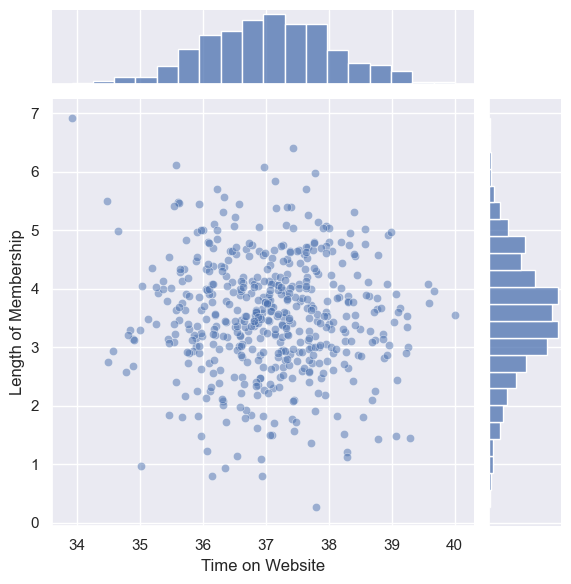

In [65]:
sns.jointplot(data = df, x = 'Time on Website', y = 'Length of Membership', alpha = 0.5)

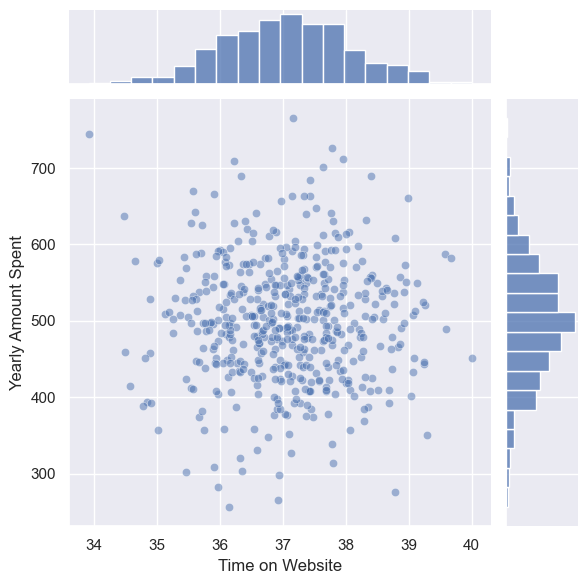

In [66]:
sns.jointplot(data = df, x = 'Time on Website', y = 'Yearly Amount Spent', alpha = 0.5)

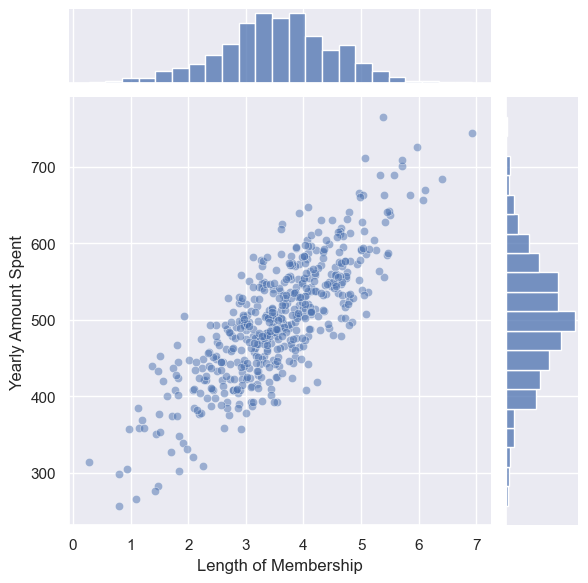

In [67]:
sns.jointplot(data = df, x = 'Length of Membership', y = 'Yearly Amount Spent', alpha = 0.5)

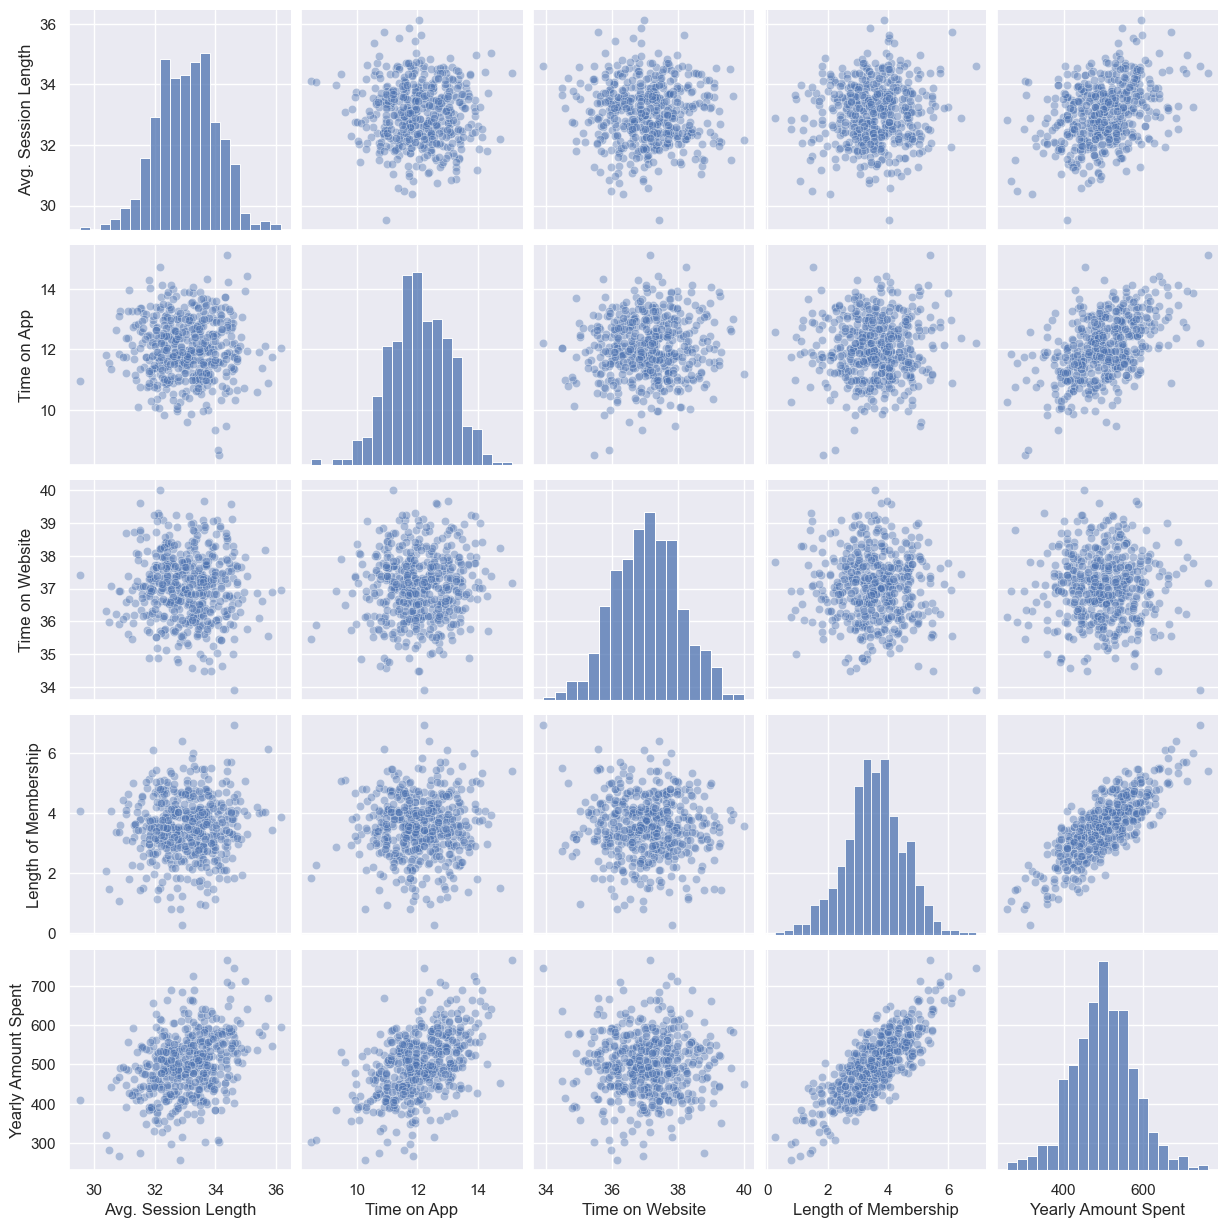

In [68]:
sns.pairplot(data = df, kind = 'scatter', plot_kws = {'alpha': 0.4})

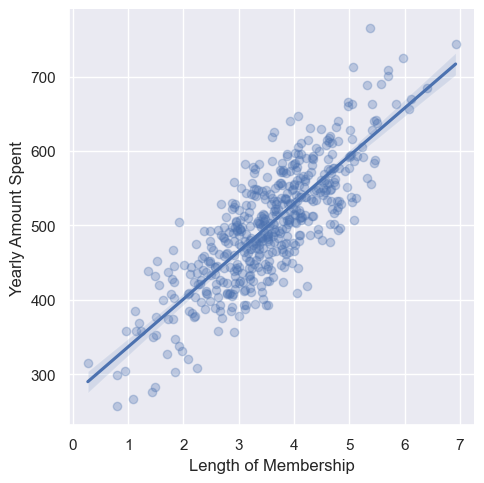

In [69]:
sns.lmplot(data = df, x = 'Length of Membership', y = 'Yearly Amount Spent', scatter_kws = {'alpha': 0.3})

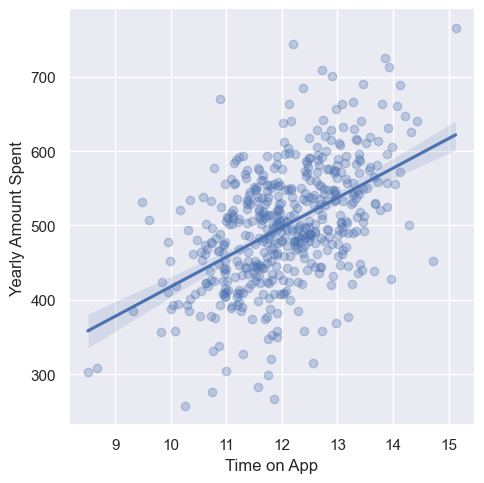

In [70]:
sns.lmplot(data = df, x = 'Time on App', y = 'Yearly Amount Spent', scatter_kws = {'alpha': 0.3})

In [71]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle = True)

In [73]:
print('The size of training dataset is:', X_train.shape[0])
print('==================================================')
print('The size of test dataset is:', X_test.shape[0])

The size of training dataset is: 400
The size of test dataset is: 100


In [74]:
scaler = StandardScaler()

In [75]:
X_train_scaled = scaler.fit_transform(X_train)

In [76]:
X_test_scaled = scaler.fit_transform(X_test)

In [77]:
lm = LinearRegression()

In [82]:
cvs = cross_val_score(lm, X_train, y_train, cv = 5)
print('Validation Accuracy is:', cvs.mean())

Validation Accuracy is: 0.9819658782891872


In [83]:
lm.fit(X_train, y_train)

LinearRegression()

In [84]:
preds = lm.predict(X_test)

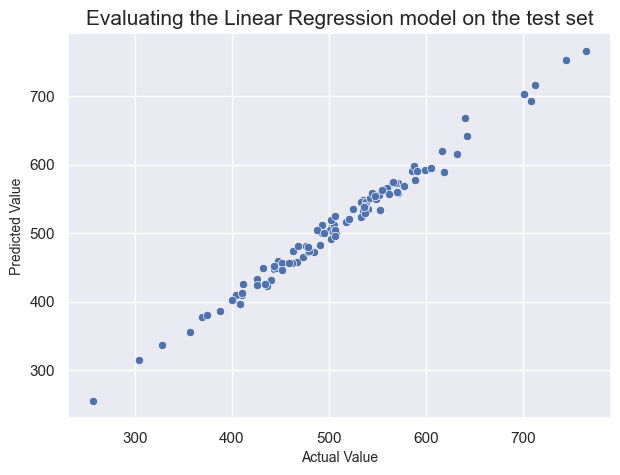

In [87]:
plt.figure(figsize = (7, 5))
sns.scatterplot(x = y_test, y = preds)
plt.title('Evaluating the Linear Regression model on the test set', fontsize = 15)
plt.xlabel('Actual Value', fontsize = 10)
plt.ylabel('Predicted Value', fontsize = 10)
plt.show()

In [89]:
print('Mean Absolute Error is:', mean_absolute_error(y_test, preds))
print('===========================================================')
print('Mean Squared Error is:', mean_squared_error(y_test, preds))
print('===========================================================')
print('RMSE is:', math.sqrt(mean_squared_error(y_test, preds)))

Mean Absolute Error is: 7.758907540457825
Mean Squared Error is: 91.82335857016868
RMSE is: 9.582450551407437


In [90]:
residuals = y_test - preds

C:\Users\loptop\AppData\Local\Temp\ipykernel_13804\3261525254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins = 30, kde = True)


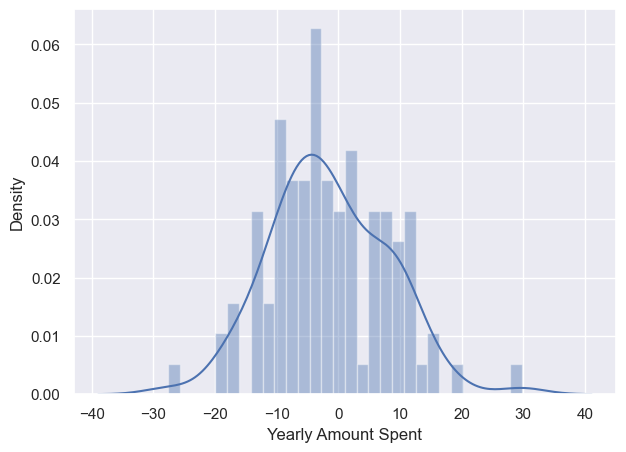

In [91]:
plt.figure(figsize = (7, 5))
sns.distplot(residuals, bins = 30, kde = True)
plt.show()

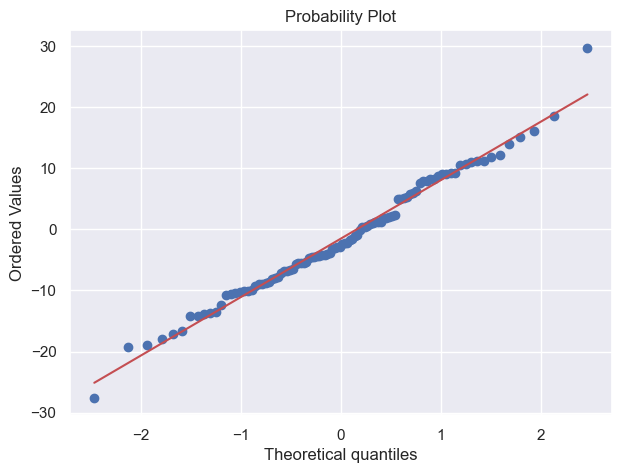

In [94]:
plt.figure(figsize = (7, 5))
stats.probplot(residuals, dist = 'norm', plot = pylab)
pylab.show()